In [1]:
import math
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from topobenchmark.data.loaders import DarkPhotonDatasetLoader
from omegaconf import OmegaConf

In [2]:
dataset_config = {"data_dir": "datasets/pointcloud/dark_photons",
                  "data_name": "dark_photons"}

config = OmegaConf.create(dataset_config)

In [3]:
loader = DarkPhotonDatasetLoader(config)
dataset, _ = loader.load()

Loaded dataset containing subset of 1.0


In [4]:
print(dataset)

DarkPhotonDataset(99992)


In [18]:
dataset.slices['y'].shape

torch.Size([99993])

In [5]:
data = next(iter(dataset))
print(data.x)
print(max(data.x[:,1]))
print(len(list(combinations(data.x,2))))

tensor([[ 0.0000, -0.2029,  0.1801,  0.0153],
        [ 0.0000,  0.0216, -0.1803,  0.0240],
        [ 0.0000, -0.0027,  0.0705,  0.0109],
        [ 2.0000, -0.1479,  0.0967,  0.0138],
        [ 2.0000,  0.0000,  0.0000,  0.9953]])
tensor(0.0216)
10


In [6]:
def get_max_diff(data):
    delta_eta = max(data.x[:,1]) - min(data.x[:, 1])
    delta_phi = max(data.x[:,2]) - min(data.x[:, 2])
    delta_ene = max(data.x[:,3]) - min(data.x[:, 3])
    
    if delta_phi > math.pi:
        print(max(data.x[:,2]), min(data.x[:, 2]))
    return delta_eta, delta_phi, delta_ene

def get_max_diff_dataset(dataset):
    delta_eta = []
    delta_phi = []
    delta_ene = []
    for data in tqdm(dataset):
        d_eta, d_phi, d_ene = get_max_diff(data)
        delta_eta.append(d_eta)
        delta_phi.append(d_phi)
        delta_ene.append(d_ene)
    return np.array(delta_eta), np.array(delta_phi), np.array(delta_ene)

In [7]:
delta_eta, delta_phi, delta_ene = get_max_diff_dataset(dataset)

  0%|          | 0/99992 [00:00<?, ?it/s]

Max eta diff 0.8508788347244263
Max phi diff 0.8139240741729736
Max ene diff 1.3011260032653809


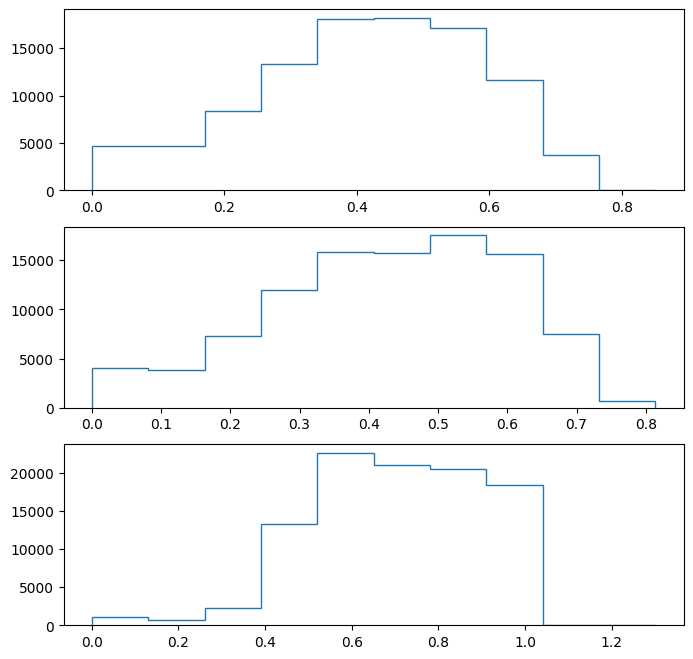

In [8]:
print(f"Max eta diff {np.max(delta_eta)}")
print(f"Max phi diff {np.max(delta_phi)}")
print(f"Max ene diff {np.max(delta_ene)}")

hist_eta, bins_eta = np.histogram(delta_eta)
hist_phi, bins_phi = np.histogram(delta_phi)
hist_ene, bins_ene = np.histogram(delta_ene)


fig, axs = plt.subplots(3)
axs[0].stairs(hist_eta, bins_eta)
axs[1].stairs(hist_phi, bins_phi)
axs[2].stairs(hist_ene, bins_ene)

In [9]:
import torch
torch.max(dataset.x,0)

torch.return_types.max(
values=tensor([3.0000, 0.7005, 0.6540, 1.3953]),
indices=tensor([     9, 366833, 645286, 688932]))

In [10]:
print(torch.arange(5))

tensor([0, 1, 2, 3, 4])


In [11]:
torch.isin(dataset.x[:10,0], torch.tensor([0,1,2]))

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True, False])